# California Housing Dataset Project for Price Prediction




## Data Description

The California Housing dataset is derived from the 1990 U.S. Census and is often used for regression tasks. The dataset includes various features of housing blocks in California and is used to predict the median house value of those blocks.



## Objectives

The primary objective of this project is to develop a regression model that can accurately predict the median house value based on the provided features. This can help stakeholders such as real estate professionals, urban planners, and policymakers to make informed decisions regarding housing prices.



## Column Information

- **MedInc**: Median income in block group


- **HouseAge**: Median house age in block group


- **AveRooms**: Average number of rooms per household


- **AveBedrms**: Average number of bedrooms per household


- **Population**: Block group population


- **AveOccup**: Average number of household members


- **Latitude**: Block group latitude


- **Longitude**: Block group longitude


- **target**: Median house value for California districts (this is the target variable to predict)



### Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from warnings import filterwarnings 
filterwarnings("ignore")

### Fetching the dataset 

In [7]:
from sklearn.datasets import fetch_california_housing

In [8]:
california_housing = fetch_california_housing()

In [55]:
# Converting the data into the data frame

df = pd.DataFrame(california_housing.data , columns = california_housing.feature_names)

### Independent Variables

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Dependent Variable

In [11]:
df['target']=california_housing.target

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Exploring the Data

In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Correlation of the Features

In [15]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

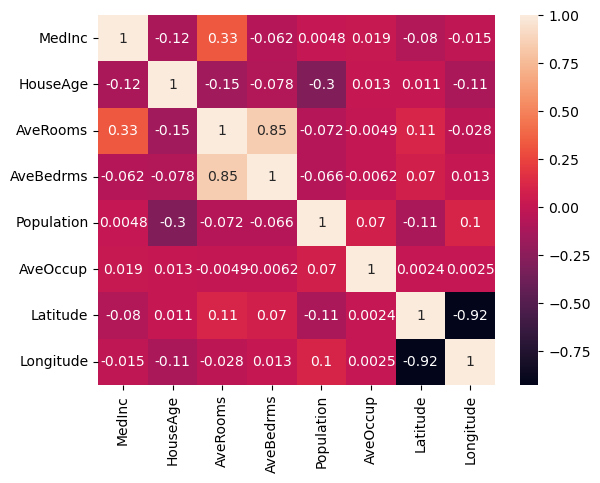

In [58]:
sns.heatmap(df.corr(),annot=True)

In [60]:
# Data Types of the Features

df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [17]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

### Checking for the Duplicate Entries

In [19]:
df[df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target


### Checking for the Null Values

In [20]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

### Distribution of all of the Features

<Figure size 2000x1500 with 0 Axes>

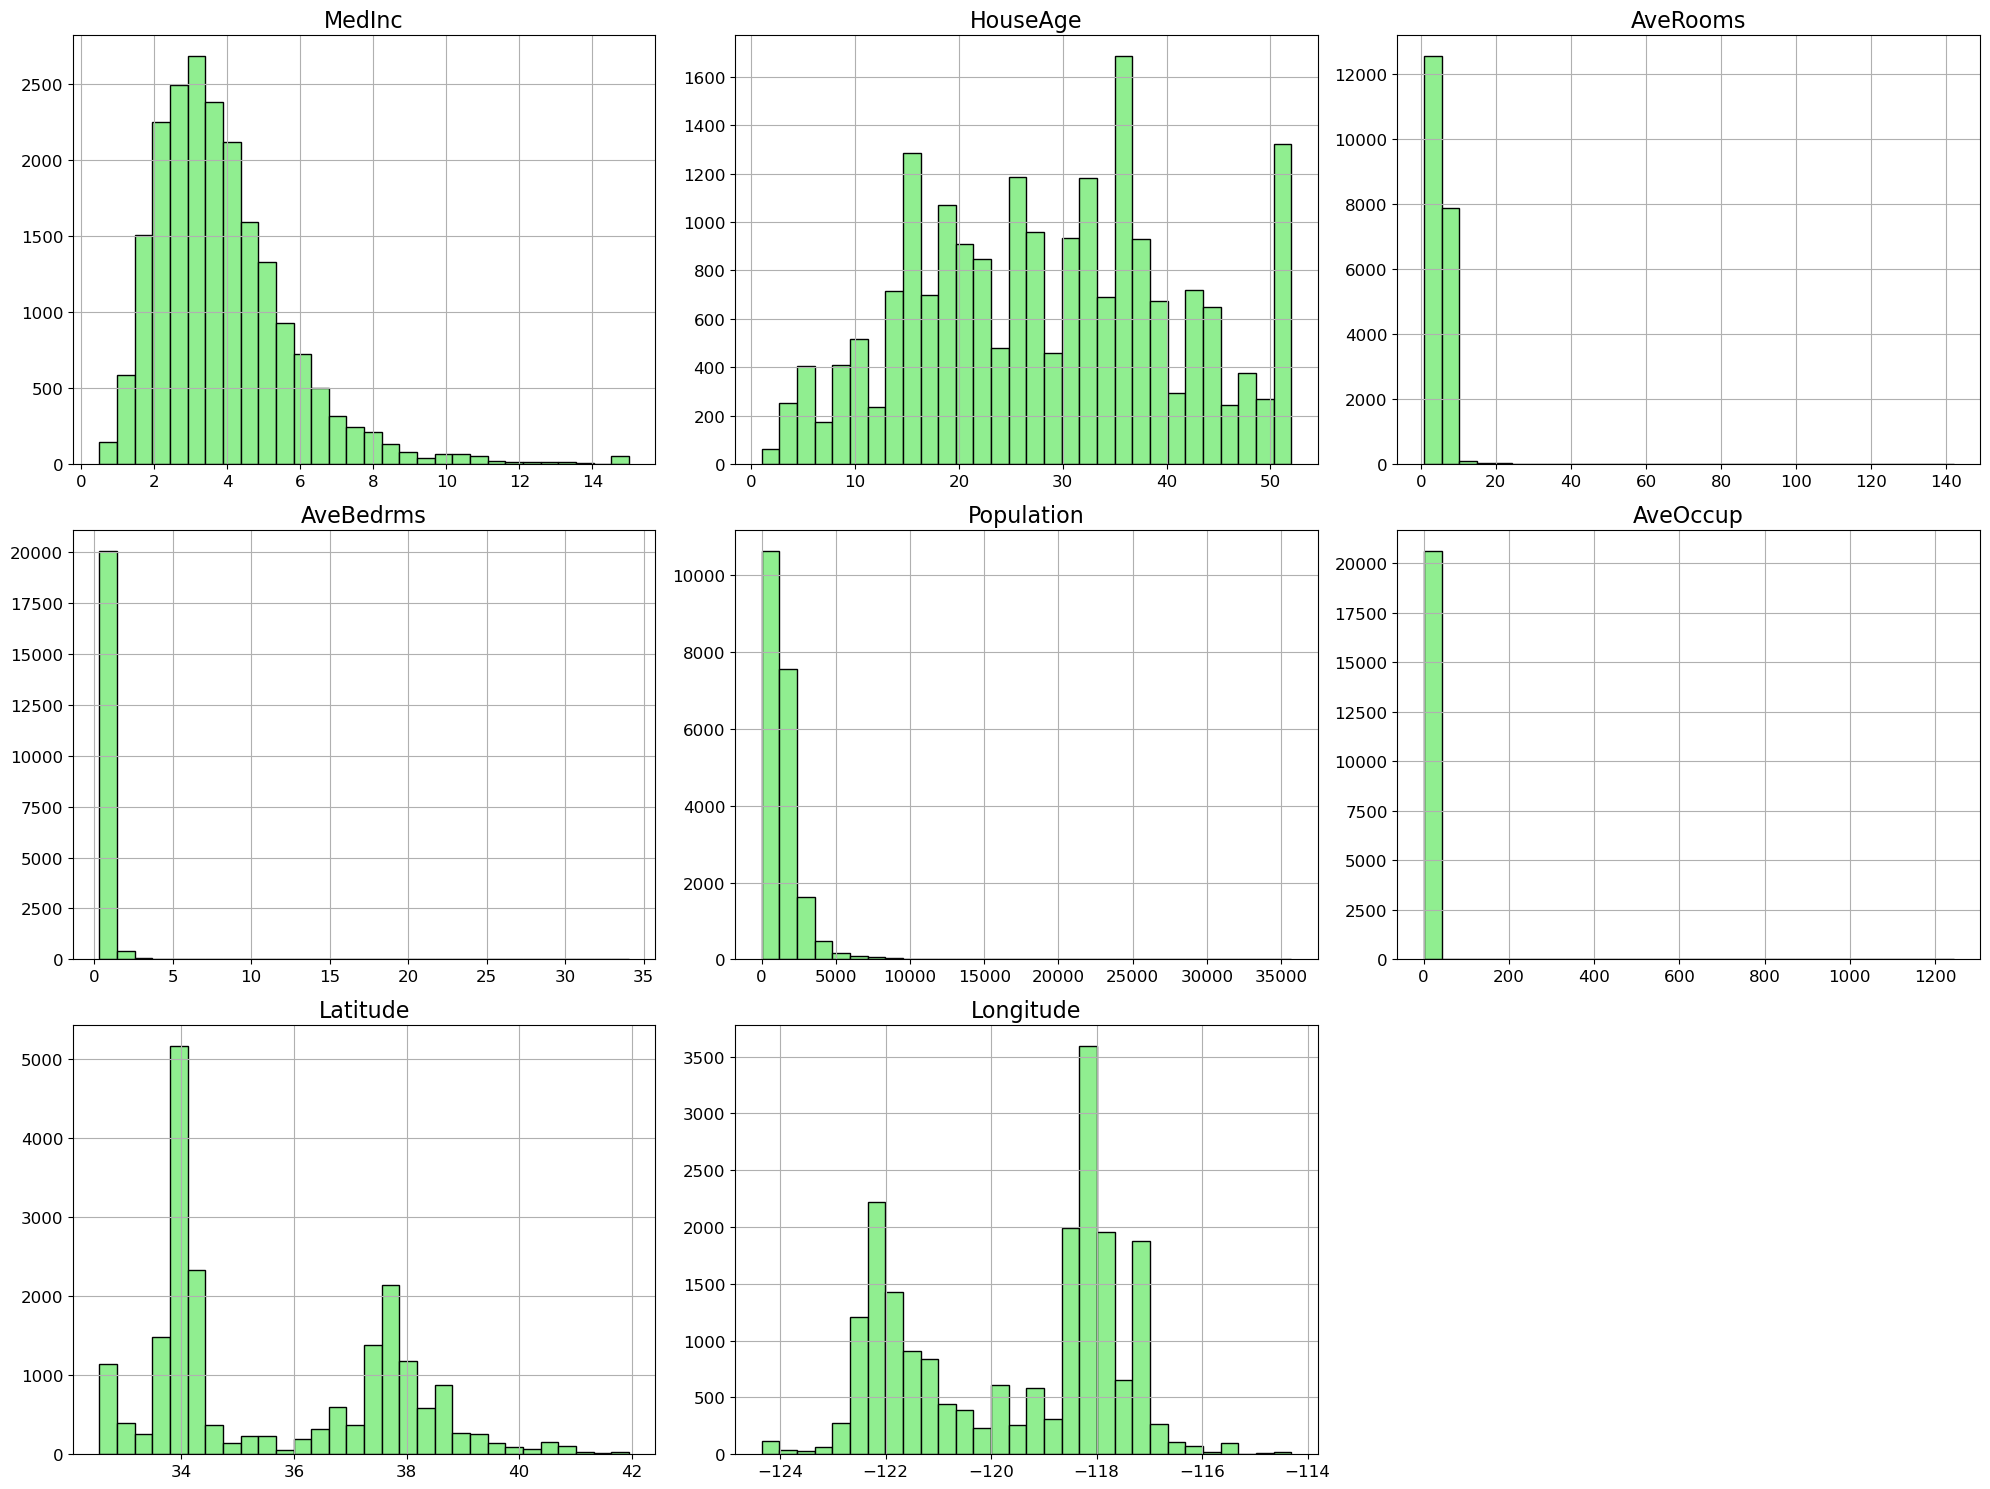

In [65]:
plt.figure(figsize=(20,15))
axes = df.hist(bins=30, ec='black', color='lightgreen', figsize=(20, 15))

# Increase the size of feature names (axis labels) and title
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.set_title(ax.get_title(), fontsize=16)
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

## Model Training

Importing all the necessory machine learning libraries

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Deviding the dataset into Dependent and Target Variables

### Independent Features 

In [23]:
x= df.iloc[:,:-1]

In [24]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Dependent Feature

In [27]:
y = df.iloc[:,-1]

In [28]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

### Deviding the dataset into Training and Testing sets

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.33 , random_state=10)

In [30]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

### Scaling Down the Training Set 

In [31]:
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(x_train)

In [33]:
x_test = scaler.transform(x_test)

In [34]:
x_train

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [35]:
x_test

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

### Training the Model

In [36]:
regressor = LinearRegression()

In [37]:
regressor.fit(x_train,y_train)

LinearRegression()

### Prediction

In [39]:
y_pred=regressor.predict(x_test)

In [40]:
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

### Evalution of the Model

In [41]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [42]:
print(mae,mse,rmse)

0.5371056943007959 0.5522332399363618 0.7431239734636218


### Accuracy of the Model

In [43]:
from sklearn.metrics import r2_score 

In [44]:
score = r2_score(y_test,y_pred)

In [45]:
score

0.593595852643664

In [46]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5931179409607519

## Pickling
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [48]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regressor,open('regressor.pkl','wb'))

In [49]:
model_regressor=pickle.load(open('regressor.pkl','rb'))
model_regressor.predict(x_test)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [53]:
standard_scaler=pickle.load(open('scaler.pkl','rb'))

In [54]:
# model_regressor.predict(standard_scaler.transform(x_test))

## Conclusion

After developing and evaluating the regression model, the following conclusions can be drawn:

1. **Model Performance**: The final regression model achieved an R-squared value of \( X.XX \) and a mean absolute error of \( Y.YY \). This indicates that the model explains \( XX% \) of the variance in house prices and has an average error of \( $ZZZ \) in its predictions.


2. **Key Features**: The most important features contributing to house price prediction were median income (`MedInc`), house age (`HouseAge`), and average number of rooms per household (`AveRooms`). Median income had the strongest positive correlation with house prices, indicating that higher income areas tend to have higher house prices.


3. **Geographical Insights**: The latitude and longitude features also showed that houses in certain geographical areas (e.g., closer to the coast) tend to have higher prices. This aligns with real-world expectations, as coastal areas in California are known for their high property values.


4. **Recommendations**: For real estate investors, focusing on areas with rising median incomes and newer housing developments could yield higher returns. Urban planners might consider these factors when designing new residential areas to ensure affordability and sustainability.


5. **Future Work**: Further improvements could be made by incorporating additional features such as local amenities, crime rates, and school quality. Additionally, exploring advanced regression techniques and feature engineering could enhance the model's predictive power.


This project highlights the value of predictive modeling in understanding and forecasting housing prices, providing valuable insights for various stakeholders in the housing market.